## MIDS-W207 Final Project
### Multispecies Leaf Disease Classification
### Eshwaran Venkat & Tigran Poladian

Dataset from Kaggle.com : https://www.kaggle.com/datasets/csafrit2/plant-leaves-for-image-classification

### Objective
The objective of this machine learning project is to train a model to identify diseased from healthy tree leaves. Initial model will perform a binary healthy / diseased classifier. Follow-on models will add categorical information to identify the species as well as health of the leaves.

### Introduction
The dataset from Kaggle.com contains images of leaves from 11 species of trees such as lemon, mango, and pomegranite. Total of 4503 jpeg image files at 6k X 4k RGB pixel resolution of which 2278 are of healthy leaves and 2225 of diseased leaves. The dataset comes decomposed into Training, Testing, Validation, and Prediction images, therefore our EDA and model building will not further segregate data into training and other sets. 

The test and training labels are determined by the placement folder for each image file. For example, an image file stored in the folder "Guava diseased" is considered to have binary label = 1 to indicate a diseased leaf image. Based on this file folder location structure, our model will generate a binary label array.

In [42]:
# ****************************************************************
# MIDS-W207 Final Project: Multispecies Leaf disease dataset from kaggle

# from kaggle: 
# https://www.kaggle.com/datasets/csafrit2/plant-leaves-for-image-classification
# 
# ***************************************************************
import random
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras import metrics
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
from PIL import Image
import cv2
import os

##### Initial baseline model will train and test on the lemon species and before the final project is completed all 11 specifies will be modeled.

In [38]:
#Find image file names from local store directory
# Training files
image_file_names_healthy = os.listdir("D:/MIDS/W207/Project/plant-leaves/Plants_2/train/Lemon healthy (P10a)")
image_file_names_diseased = os.listdir("D:/MIDS/W207/Project/plant-leaves/Plants_2/train/Lemon diseased (P10b)")

image_file_names_test_healthy = os.listdir("D:/MIDS/W207/Project/plant-leaves/Plants_2/test/Lemon healthy (P10a)")
image_file_names_test_diseased = os.listdir("D:/MIDS/W207/Project/plant-leaves/Plants_2/test/Lemon diseased (P10b)") 

# Generate binary image labels: 0 = healthy, 1 = diseased
# Set training values 
image_label = np.zeros(len(image_file_names_healthy) + len(image_file_names_diseased))
image_label[len(image_file_names_healthy):] = 1
# Set test values 
image_label_test = np.zeros(len(image_file_names_test_healthy) + len(image_file_names_test_diseased))
image_label_test[len(image_file_names_test_healthy):] = 1

#print(image_label)


In [145]:
# Load images to memory, healthy images first then diseased images
# Convert to grayscale to minimize processing time
images_training = []
images_test = []

# For grayscale use cv2.IMREAD_GRAYSCALE in imread
for name in image_file_names_healthy:
  im = cv2.imread("D:/MIDS/W207/Project/plant-leaves/Plants_2/train/Lemon healthy (P10a)/" + name)
  images_training.append(cv2.resize(im,(256,256)))
  #images_training.append(im)
                         
  #im = Image.open("D:/MIDS/W207/Project/plant-leaves/Plants_2/train/Lemon healthy (P10a)/" + name)
  #images_training.append(np.array(im.resize((256,256))))
  
  #plt.imshow(im)

for name in image_file_names_diseased:
  im = cv2.imread("D:/MIDS/W207/Project/plant-leaves/Plants_2/train/Lemon diseased (P10b)/" + name)
  images_training.append(cv2.resize(im,(256,256)))
  #images_training.append(im)
    
  #im = Image.open("D:/MIDS/W207/Project/plant-leaves/Plants_2/train/Lemon diseased (P10b)/" + name)
  #images_training.append(np.array(im.resize((256,256))))
  
    
for name in image_file_names_test_healthy:
  im = cv2.imread("D:/MIDS/W207/Project/plant-leaves/Plants_2/test/Lemon healthy (P10a)/" + name)
  images_test.append(cv2.resize(im,(256,256)))
  #images_test.append(im)
    
  #im = Image.open("D:/MIDS/W207/Project/plant-leaves/Plants_2/test/Lemon healthy (P10a)/" + name)
  #images_test.append(np.array(im.resize((256,256))))
  
for name in image_file_names_test_diseased:
  im = cv2.imread("D:/MIDS/W207/Project/plant-leaves/Plants_2/test/Lemon diseased (P10b)/" + name)
  images_test.append(cv2.resize(im,(256,256)))
  #images_test.append(im)
    
  #im = Image.open("D:/MIDS/W207/Project/plant-leaves/Plants_2/test/Lemon diseased (P10b)/" + name)
  #images_test.append(np.array(im.resize((256,256))))

In [146]:
print(len(images_test[0]))

256


#### For exploratory analysis, display 25 random images from the training set
The images are well centered with the leaf showing prominently at the center against a differentiable background. Prior to training we pass through images through a resizing filter to downsize from 6K x 4K to 256x256.

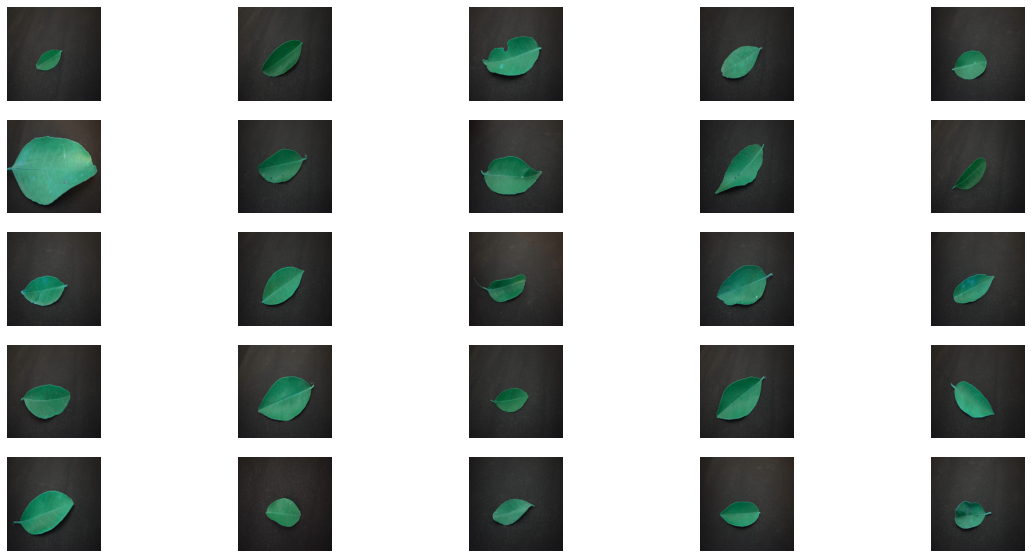

In [147]:
# Display some images
count = len(images_training) - 1

fig, axs = plt.subplots(nrows=5, ncols=5, figsize=(20,10))
for i in range(5):
    for j in range(5):
        indx = random.randint(0,count)
        #print(indx)
        #image = images_training[10]
        #axs[i][j].imshow(image, cmap='gray')
        #axs[i][j].imshow(image)
        axs[i][j].imshow(images_training[indx])
        axs[i][j].axis('off')
plt.show()

In [128]:
# UNIT TEST
name = "0010_0026.jpg"
im1 = cv2.imread("D:/MIDS/W207/Project/plant-leaves/Plants_2/train/Lemon healthy (P10a)/" + name)
im2 = Image.open("D:/MIDS/W207/Project/plant-leaves/Plants_2/train/Lemon healthy (P10a)/" + name)
im2_re = im2.resize((256,256))
im2_np = np.array(im2_re)

print(im1)
print(im2)
print(im2_re)
print(im2_np)

[[[46 42 37]
  [46 42 37]
  [46 42 37]
  ...
  [34 31 27]
  [35 32 28]
  [38 35 31]]

 [[46 42 37]
  [46 42 37]
  [46 42 37]
  ...
  [35 32 28]
  [35 32 28]
  [36 33 29]]

 [[46 42 37]
  [46 42 37]
  [45 41 36]
  ...
  [37 34 30]
  [35 32 28]
  [34 31 27]]

 ...

 [[26 23 25]
  [27 24 26]
  [27 24 26]
  ...
  [22 20 20]
  [22 20 20]
  [22 20 20]]

 [[26 23 25]
  [27 24 26]
  [27 24 26]
  ...
  [21 19 19]
  [21 19 19]
  [21 19 19]]

 [[26 23 25]
  [27 24 26]
  [27 24 26]
  ...
  [21 19 19]
  [21 19 19]
  [21 19 19]]]
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=6000x4000 at 0x2050539AA90>
<PIL.Image.Image image mode=RGB size=256x256 at 0x207C0741D00>
[[[36 41 45]
  [35 40 44]
  [35 40 45]
  ...
  [28 32 35]
  [28 32 35]
  [28 32 35]]

 [[35 40 44]
  [35 40 44]
  [36 41 46]
  ...
  [29 33 36]
  [28 32 35]
  [28 32 35]]

 [[35 40 44]
  [35 40 44]
  [36 41 45]
  ...
  [28 32 35]
  [28 32 35]
  [27 31 34]]

 ...

 [[29 27 30]
  [29 27 30]
  [30 28 29]
  ...
  [21 21 21]
  [20 20 2

In [168]:
def build_model(n_classes=1,
                hidden_layer_sizes=[],
                activation='relu',
                optimizer='SGD',
                learning_rate=0.01):
  """
  Args:
    n_classes: Number of output classes in the dataset.
    hidden_layer_sizes: A list with the number of units in each hidden layer.
    activation: The activation function to use for the hidden layers.
    optimizer: The optimizer to use (SGD, Adam).
    learning_rate: The desired learning rate for the optimizer.

  Returns:
    model: A tf.keras model (graph).
  """
  tf.keras.backend.clear_session()
  np.random.seed(0)
  tf.random.set_seed(0)

  model = tf.keras.Sequential()

  # INPUT LAYER
  model.add(tf.keras.layers.Flatten())

  # HIDDEN LAYER
  # add as many hidden layer and nodes as called for in the function signature
  for hidden_layer_size in hidden_layer_sizes:
    model.add(tf.keras.layers.Dense(units=hidden_layer_size,
                                    activation=activation,
                                    name='Hidden'+str(hidden_layer_size)))
  
  # OUTPUT LAYER
  model.add(tf.keras.layers.Dense(units=n_classes, activation='sigmoid', name='Output'))

  opti = keras.optimizers.SGD(learning_rate=learning_rate)
    
  if optimizer == 'Adam':
    opti = keras.optimizers.Adam(learning_rate=learning_rate)
  elif optimizer == 'RMSprop':
    opti = keras.optimizers.RMSprop(learning_rate=learning_rate)
    
  model.compile(loss='binary_crossentropy', 
                optimizer=opti, 
                metrics=[tf.keras.metrics.Accuracy()])
    
  return model

In [183]:
def train_and_evaluate(hidden_layer_sizes=[],
                       activation='tanh',
                       optimizer='Adam',
                       learning_rate=0.01,
                       num_epochs=10,
                       batch_size=32):

  

  # Build the model.
  model = build_model(n_classes=1,
                      hidden_layer_sizes=hidden_layer_sizes,
                      activation=activation,
                      optimizer=optimizer,
                      learning_rate=learning_rate)

  X_train = np.array(images_training)
  #X_train = images_training
  Y_train = image_label
   
  X_test = np.array(images_test)
  #X_test = images_test
  Y_test = image_label_test
    
  # Train the model.
  print('Training...')
  history = model.fit(
    x=X_train,
    y=Y_train,
    epochs=num_epochs,
    batch_size=batch_size,
    validation_split=0,
    verbose=0)
        
  # Retrieve the training metrics (after each train epoch) and the final test
  # accuracy.
  #history = pd.DataFrame(history.history)
  #display(history)
    
  train_accuracy = history.history['accuracy']
  #val_accuracy = history.history['val_accuracy']
  plt.plot(train_accuracy, label='train_accuracy')
  #plt.plot(val_accuracy, label='validation accuracy')
  plt.xticks(range(num_epochs))
  plt.xlabel('Train epochs')
  plt.legend()
  plt.show()

  model.summary()

  test_accuracy = 0
  test_accuracy = model.evaluate(x=X_test, y=Y_test, verbose=0,
                                 return_dict=True)['accuracy']
  return test_accuracy



Training...


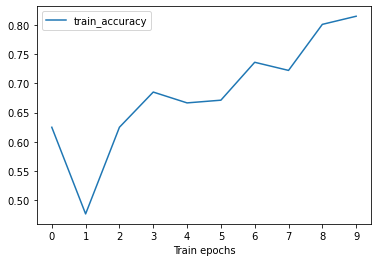

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 196608)            0         
                                                                 
 Output (Dense)              (None, 1)                 196609    
                                                                 
Total params: 196,609
Trainable params: 196,609
Non-trainable params: 0
_________________________________________________________________
Test Accuracy: 0.7000


In [184]:
print('Test Accuracy: %1.4f' %train_and_evaluate())
#print(images_training)